In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import rc
from scipy.signal import find_peaks 
from cProfile import label

In [2]:
MnCl2_01M_HCl_path = "./MnCl2_in_HCl.CSV"
MnCl2_hcl=pd.read_csv(MnCl2_01M_HCl_path, sep=';', decimal=',', index_col = 0)
# display(MnCl2_hcl)

In [3]:
def conc_MnCl2(m, V):
  c = m/(197.91*V)
  return c

def epsilon(A, c):
  eps = A/c
  return eps

def cross_section(c, A):
  n=(6.022*10**23)*(c/1000) #c is in mol/L so the division by 1000 is conversion from L to cm**3
  sigma=A/n #l is not included since it is equal to 1cm
  return sigma

V_array = np.full(7, 0.01)
m_array = np.array([6.096, 3.300, 1.644, 0.853, 0.436, 0.229, 0.114])
c_list = conc_MnCl2(m_array, V_array)
print(c_list)

[3.08018796 1.66742459 0.83068061 0.43100399 0.22030216 0.11570916
 0.05760194]


In [4]:
eps_1 = epsilon(MnCl2_hcl['s1.2'], c_list[0])
eps_2 = epsilon(MnCl2_hcl['s2.2'], c_list[1])
eps_3 = epsilon(MnCl2_hcl['s3.2'], c_list[2])
eps_4 = epsilon(MnCl2_hcl['s4.2'], c_list[3])
eps_5 = epsilon(MnCl2_hcl['s5.2'], c_list[4])
eps_6 = epsilon(MnCl2_hcl['s6.2'], c_list[5])
eps_7 = epsilon(MnCl2_hcl['s7.2'], c_list[6])

sigma1 = pd.DataFrame(cross_section(c_list[0], MnCl2_hcl['s1.2']))
sigma1.columns = ['s1.2']
sigma2 = pd.DataFrame(cross_section(c_list[1], MnCl2_hcl['s2.2']))
sigma2.columns = ['s2.2']
sigma3 = pd.DataFrame(cross_section(c_list[2], MnCl2_hcl['s3.2']))
sigma3.columns = ['s3.2']
sigma4 = pd.DataFrame(cross_section(c_list[3], MnCl2_hcl['s4.2']))
sigma4.columns = ['s4.2']
sigma5 = pd.DataFrame(cross_section(c_list[4], MnCl2_hcl['s5.2']))
sigma5.columns = ['s5.2']
sigma6 = pd.DataFrame(cross_section(c_list[5], MnCl2_hcl['s6.2']))
sigma6.columns = ['s6.2']
sigma7 = pd.DataFrame(cross_section(c_list[6], MnCl2_hcl['s7.2']))
sigma7.columns = ['s7.2']

cross_sec = pd.DataFrame(np.array([sigma1['s1.2'], sigma2['s2.2'], sigma3['s3.2'], sigma4['s4.2'], sigma5['s5.2'], sigma6['s6.2'], sigma7['s7.2']]).T, 
                        columns=['s1.2', 's2.2', 's3.2', 's4.2', 's5.2', 's6.2', 's7.2'], index = MnCl2_hcl.index.values )
cross_sec = cross_sec.rename_axis(index = "Wavelengt [nm]")
cross_sec.to_csv('cross_sec_inHCl.csv')

cross_sec_short = pd.DataFrame(np.array([sigma1['s1.2'], sigma2['s2.2'], sigma3['s3.2'], sigma4['s4.2']]).T, 
                        columns=['s1.2', 's2.2', 's3.2', 's4.2'], index = MnCl2_hcl.index.values )
cross_sec_short = cross_sec_short.rename_axis(index = "Wavelengt [nm]")
cross_sec_short.to_csv('cross_sec_inHClShort.csv')

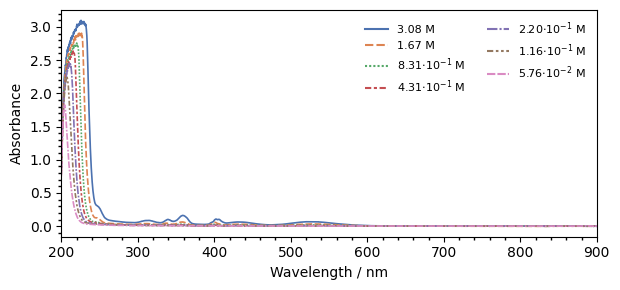

In [19]:
plt.figure(figsize=(6.3,3))
sns.set_palette("deep")
ax = sns.lineplot(data = MnCl2_hcl, lw = 1.2) 
ax.set_ylabel('Absorbance')
ax.set_xlabel('Wavelength / nm')
# ax.set_ylim(-0.01, 0.35)
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['3.08 M', '1.67 M', '8.31$\cdot$10$^{-1}$ M', '4.31$\cdot$10$^{-1}$ M', '2.20$\cdot$10$^{-1}$ M', '1.16$\cdot$10$^{-1}$ M', '5.76$\cdot$10$^{-2}$ M'], 
        frameon = False, ncol = 2, fontsize = 8)
# rcParams['legend.columnspacing']=1
plt.tight_layout()
plt.savefig('in_HCl_full.png', dpi=150)
plt.show()

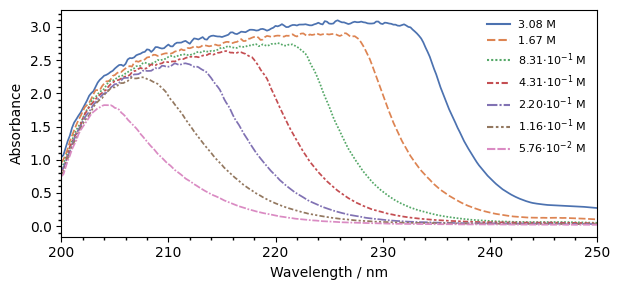

In [20]:
plt.figure(figsize=(6.3,3))
sns.set_palette("deep")
ax = sns.lineplot(data = MnCl2_hcl, lw = 1.25, ) 
ax.set_ylabel('Absorbance')
ax.set_xlabel('Wavelength / nm')
# ax.set_ylim(-0.01, 0.35)
ax.set_xlim(200, 250)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['3.08 M', '1.67 M', '8.31$\cdot$10$^{-1}$ M', '4.31$\cdot$10$^{-1}$ M', '2.20$\cdot$10$^{-1}$ M', '1.16$\cdot$10$^{-1}$ M', '5.76$\cdot$10$^{-2}$ M'],
           frameon = False, fontsize = 8)
# mpl.rcParams['legend.columnspacing']=1
plt.tight_layout()
plt.savefig('in_HCl_peak.png', dpi=150)


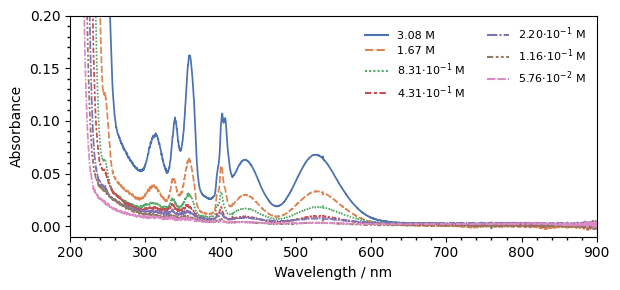

In [21]:
plt.figure(figsize=(6.3,3))
sns.set_palette("deep")
ax = sns.lineplot(data = MnCl2_hcl, lw = 1.25, ) 
ax.set_ylabel('Absorbance')
ax.set_xlabel('Wavelength / nm')
ax.set_ylim(-0.01, 0.2)
ax.set_xlim(200, 900)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['3.08 M', '1.67 M', '8.31$\cdot$10$^{-1}$ M', '4.31$\cdot$10$^{-1}$ M', '2.20$\cdot$10$^{-1}$ M', '1.16$\cdot$10$^{-1}$ M', '5.76$\cdot$10$^{-2}$ M'],
           frameon = False, ncol = 2, fontsize = 8)
# rcParams['legend.columnspacing']=1
plt.tight_layout()
plt.savefig('MnCl2_HCl.png', dpi=150)


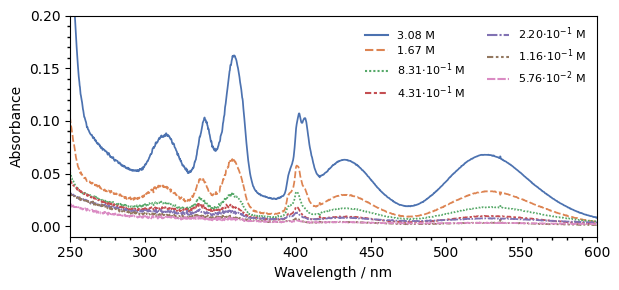

In [23]:
plt.figure(figsize=(6.3,3))
sns.set_palette("deep")
ax = sns.lineplot(data = MnCl2_hcl, lw = 1.25) 
ax.set_ylabel('Absorbance')
ax.set_xlabel('Wavelength / nm')
ax.set_ylim(-0.01, 0.2)
ax.set_xlim(250, 600)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['3.08 M', '1.67 M', '8.31$\cdot$10$^{-1}$ M', '4.31$\cdot$10$^{-1}$ M', '2.20$\cdot$10$^{-1}$ M', '1.16$\cdot$10$^{-1}$ M', '5.76$\cdot$10$^{-2}$ M'],
           frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('in_HCl_zoom.png', dpi=150)


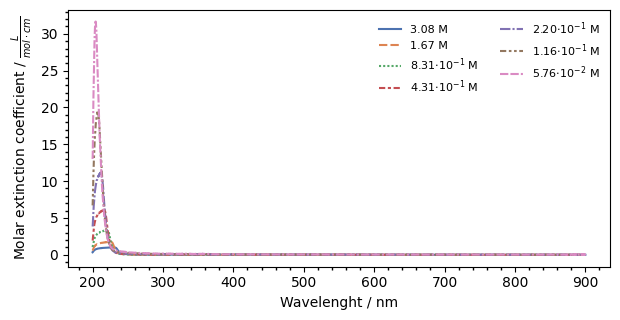

In [26]:
plt.figure(figsize=(6.3,3.3))
sns.set_palette("deep")
ax = sns.lineplot(data = [eps_1, eps_2, eps_3, eps_4, eps_5, eps_6, eps_7]) 
ax.set_ylabel(r'Molar extinction coefficient / $\frac{L}{mol \cdot cm}$')
ax.set_xlabel('Wavelenght / nm')
# ax.set_ylim(-0.01, 0.1)
# ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['3.08 M', '1.67 M', '8.31$\cdot$10$^{-1}$ M', '4.31$\cdot$10$^{-1}$ M', '2.20$\cdot$10$^{-1}$ M', '1.16$\cdot$10$^{-1}$ M', '5.76$\cdot$10$^{-2}$ M'],
           frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('HCl_full_eps.png', dpi=150)


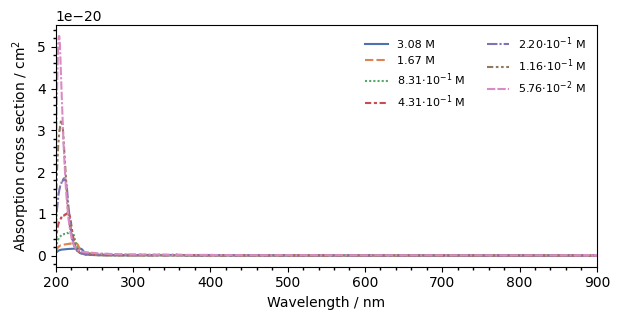

In [27]:
plt.figure(figsize=(6.3,3.3))
sns.set_palette("deep")
ax = sns.lineplot(data = cross_sec)  
ax.set_ylabel(r'Absorption cross section / cm$^{2}$')
ax.set_xlabel('Wavelength / nm')
# ax.set_ylim(-0.01, 0.1)
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['3.08 M', '1.67 M', '8.31$\cdot$10$^{-1}$ M', '4.31$\cdot$10$^{-1}$ M', '2.20$\cdot$10$^{-1}$ M', '1.16$\cdot$10$^{-1}$ M', '5.76$\cdot$10$^{-2}$ M'],
           frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('HCl_full_sigma.png', dpi=150)

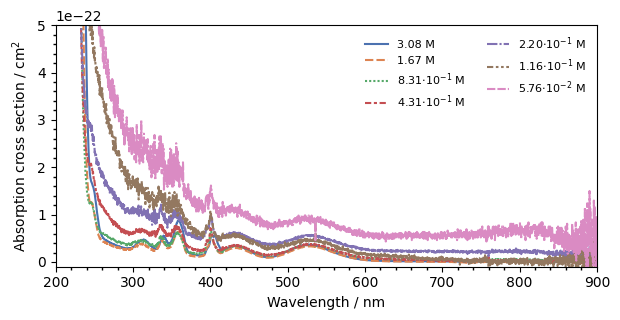

In [28]:
plt.figure(figsize=(6.3,3.3))
sns.set_palette("deep")
ax = sns.lineplot(data = cross_sec) 
ax.set_ylabel(r'Absorption cross section / cm$^{2}$')
ax.set_xlabel('Wavelength / nm')
ax.set_ylim(-10**(-23), 5*10**(-22))
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['3.08 M', '1.67 M', '8.31$\cdot$10$^{-1}$ M', '4.31$\cdot$10$^{-1}$ M', '2.20$\cdot$10$^{-1}$ M', '1.16$\cdot$10$^{-1}$ M', '5.76$\cdot$10$^{-2}$ M'],
           frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('HCl_sigma.png', dpi=150)

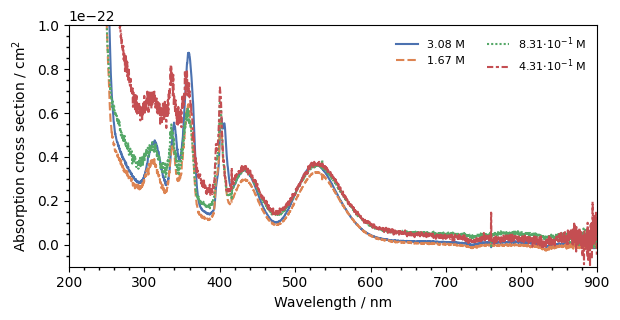

In [33]:
plt.figure(figsize=(6.3,3.3))
sns.set_palette("deep")
ax = sns.lineplot(data = cross_sec_short) 
ax.set_ylabel(r'Absorption cross section / cm$^{2}$')
ax.set_xlabel('Wavelength / nm')
ax.set_ylim(-10**(-23), 10**(-22))
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['3.08 M', '1.67 M', '8.31$\cdot$10$^{-1}$ M', '4.31$\cdot$10$^{-1}$ M'],
           frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('HCl_sigma_short.png', dpi=150)

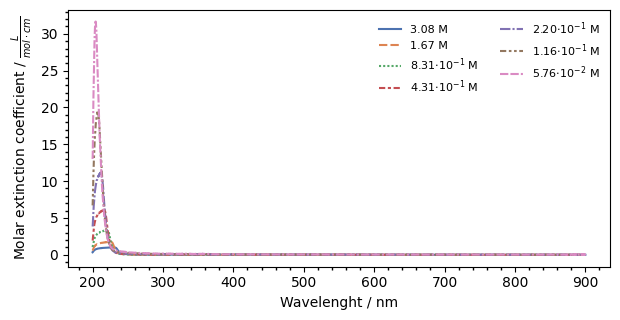

In [30]:
plt.figure(figsize=(6.3,3.3))
sns.set_palette("deep")
ax = sns.lineplot(data = [eps_1, eps_2, eps_3, eps_4, eps_5, eps_6, eps_7]) 
ax.set_ylabel(r'Molar extinction coefficient / $\frac{L}{mol \cdot cm}$')
ax.set_xlabel('Wavelenght / nm')
# ax.set_ylim(-0.01, 0.1)
# ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['3.08 M', '1.67 M', '8.31$\cdot$10$^{-1}$ M', '4.31$\cdot$10$^{-1}$ M', '2.20$\cdot$10$^{-1}$ M', '1.16$\cdot$10$^{-1}$ M', '5.76$\cdot$10$^{-2}$ M'],
           frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('HCl_full_eps.png', dpi=150)

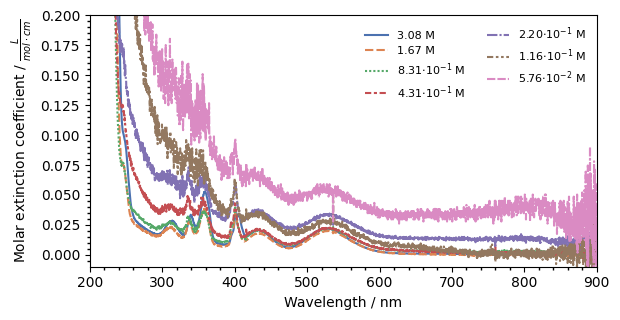

In [31]:
plt.figure(figsize=(6.3,3.3))
sns.set_palette("deep")
ax = sns.lineplot(data = [eps_1, eps_2, eps_3, eps_4, eps_5, eps_6, eps_7]) 
ax.set_ylabel(r'Molar extinction coefficient / $\frac{L}{mol \cdot cm}$')
ax.set_xlabel('Wavelength / nm')
ax.set_ylim(-0.01, 0.2)
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['3.08 M', '1.67 M', '8.31$\cdot$10$^{-1}$ M', '4.31$\cdot$10$^{-1}$ M', '2.20$\cdot$10$^{-1}$ M', '1.16$\cdot$10$^{-1}$ M', '5.76$\cdot$10$^{-2}$ M'],
           frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('HCl_eps.png', dpi=150)


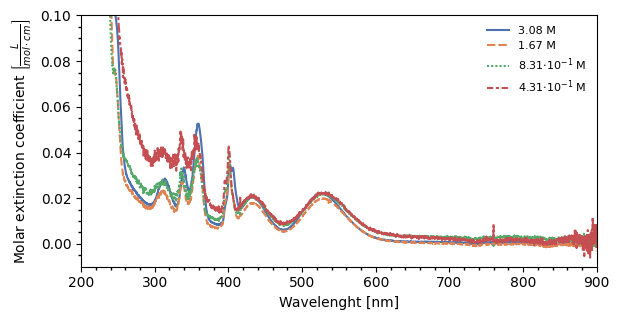

In [122]:
plt.figure(figsize=(6.3,3.3))
sns.set_palette("deep")
ax = sns.lineplot(data = [eps_1, eps_2, eps_3, eps_4]) 
ax.set_ylabel(r'Molar extinction coefficient $\left[\frac{L}{mol \cdot cm}\right]$')
ax.set_xlabel('Wavelenght [nm]')
ax.set_ylim(-0.01, 0.1)
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['3.08 M', '1.67 M', '8.31$\cdot$10$^{-1}$ M', '4.31$\cdot$10$^{-1}$ M'],
           frameon = False, fontsize = 8)
plt.tight_layout()
plt.savefig('HCl_eps2.png', dpi=150)


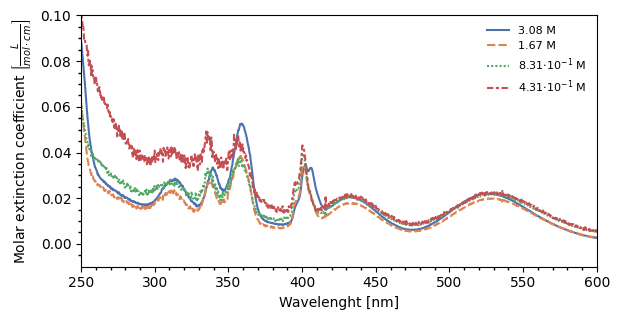

In [114]:
plt.figure(figsize=(6.3,3.3))
sns.set_palette("deep")
ax = sns.lineplot(data = [eps_1, eps_2, eps_3, eps_4]) 
ax.set_ylabel(r'Molar extinction coefficient $\left[\frac{L}{mol \cdot cm}\right]$') #L$\cdot$mol$^{-1}\cdot$cm$^{-1}$
ax.set_xlabel('Wavelenght [nm]')
ax.set_ylim(-0.01, 0.1)
ax.set_xlim(250, 600)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['3.08 M', '1.67 M', '8.31$\cdot$10$^{-1}$ M', '4.31$\cdot$10$^{-1}$ M'],
           frameon = False, fontsize = 8)
plt.tight_layout()
plt.savefig('HCl_zoom_eps.png', dpi=150)


In [86]:
df1 = MnCl2_hcl['s1.2'].copy().to_numpy()
for i in range(-5,5):
  df1[5:-6] += df1[5+i:-6+i]
  df1[5:-6] = df1[5:-6]/2
peaksgood, _ = find_peaks(df1[200:2000], distance = 10)
peaksgood = peaksgood + 200 - 5
print(MnCl2_hcl['s1.2'].iloc[peaksgood].index.tolist())

[313.4, 339.0, 358.4, 401.8, 405.0, 432.0, 526.0]


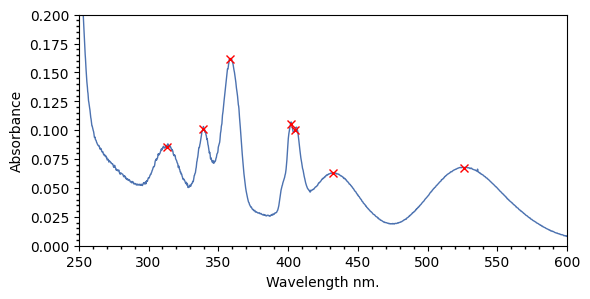

In [87]:
plt.figure(figsize=(6.3,3))
ax = sns.lineplot(data = MnCl2_hcl['s1.2'], linewidth = 1)
# plt.plot(MnCl2_only['Sample 1'].index.tolist(), df2, linewidth = 1)
plt.plot(MnCl2_hcl['s1.2'].iloc[peaksgood].index.tolist(), MnCl2_hcl['s1.2'].iloc[peaksgood].tolist(), "x", color = "r")
ax.set_ylabel('Absorbance')
ax.set_ylim(0,0.2)
ax.set_xlim(250,600)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
plt.savefig('s12_wmarkers.png', dpi = 150)


In [75]:
df2 = MnCl2_hcl['s2.2'].copy().to_numpy()
for i in range(-5,5):
  df2[5:-6] += df2[5+i:-6+i]
  df2[5:-6] = df2[5:-6]/2
peaksgood, _ = find_peaks(df2[200:2000], distance = 10)
peaksgood = peaksgood + 200 - 5
mask = np.ones_like(peaksgood, bool)
mask[[3]] = False
peaksgood = peaksgood[mask]
print(MnCl2_hcl['s2.2'].iloc[peaksgood].index.tolist())

[310.8, 336.8, 357.6, 400.6, 432.4, 526.2, 529.2]


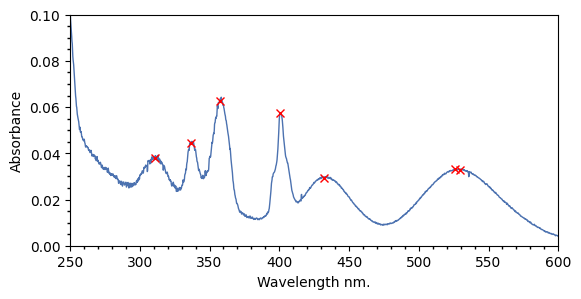

In [76]:
plt.figure(figsize=(6.3,3))
ax = sns.lineplot(data = MnCl2_hcl['s2.2'], linewidth = 1)
# plt.plot(MnCl2_only['Sample 2'].index.tolist(), df2, linewidth = 1)
plt.plot(MnCl2_hcl['s2.2'].iloc[peaksgood].index.tolist(), MnCl2_hcl['s2.2'].iloc[peaksgood].tolist(), "x", color = "r")
ax.set_ylabel('Absorbance')
ax.set_ylim(0,0.1)
ax.set_xlim(250,600)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
plt.savefig('s22_wmarkers.png', dpi = 150)


In [72]:
df2 = MnCl2_hcl['s3.2'].copy().to_numpy()
for i in range(-7,7):
  df2[8:-9] += df2[8+i:-9+i]
  df2[8:-9] = df2[8:-9]/2
peaksgood, _ = find_peaks(df2[200:2000], distance = 10)
peaksgood = peaksgood + 200 - 5
print(MnCl2_hcl['s3.2'].iloc[peaksgood].index.tolist())

[309.2, 336.2, 357.0, 400.6, 432.4, 529.6]


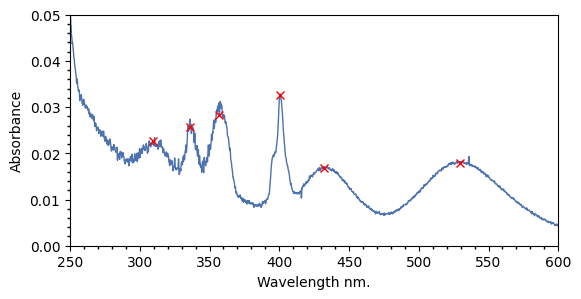

In [73]:
plt.figure(figsize=(6.3,3))
ax = sns.lineplot(data = MnCl2_hcl['s3.2'], linewidth = 1)
# plt.plot(MnCl2_only['Sample 2'].index.tolist(), df2, linewidth = 1)
plt.plot(MnCl2_hcl['s3.2'].iloc[peaksgood].index.tolist(), MnCl2_hcl['s3.2'].iloc[peaksgood].tolist(), "x", color = "r")
ax.set_ylabel('Absorbance')
ax.set_ylim(0,0.05)
ax.set_xlim(250,600)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
plt.savefig('s32_wmarkers.png', dpi = 150)


In [70]:
df2 = MnCl2_hcl['s4.2'].copy().to_numpy()
for i in range(-8,8):
  df2[8:-9] += df2[8+i:-9+i]
  df2[8:-9] = df2[8:-9]/2
peaksgood, _ = find_peaks(df2[200:2000], distance = 10)
peaksgood = peaksgood + 200 - 5
print(MnCl2_hcl['s4.2'].iloc[peaksgood].index.tolist())

[311.6, 335.8, 355.8, 400.4, 432.0, 529.6]


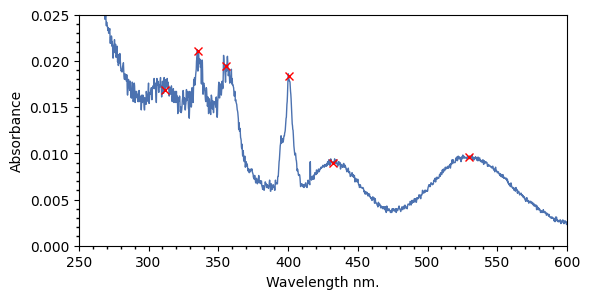

In [71]:
plt.figure(figsize=(6.3,3))
ax = sns.lineplot(data = MnCl2_hcl['s4.2'], linewidth = 1)
# plt.plot(MnCl2_only['Sample 2'].index.tolist(), df2, linewidth = 1)
plt.plot(MnCl2_hcl['s4.2'].iloc[peaksgood].index.tolist(), MnCl2_hcl['s4.2'].iloc[peaksgood].tolist(), "x", color = "r")
ax.set_ylabel('Absorbance')
ax.set_ylim(0,0.025)
ax.set_xlim(250,600)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
plt.savefig('s42_wmarkers.png', dpi = 150)